# DATA COLLECTION

In [99]:
#installing libraries


In [100]:
# #loading libraries
# import cv2
# import tensorflow as tf
# from tensorflow import keras
# import os
# import numpy
# import matplotlib.pyplot as plt
# import torch
# from keras import Sequential

# DOWLOADING DATA FROM KAGGLE

In [101]:
!pip install kaggle

In [102]:
!mkdir ~/.kaggle   #mkdir creates a new directory in the specified path

mkdir: cannot create directory ‘/root/.kaggle’: File exists


### DOWLOADING KAGGLE API TO SPECIFIED LOCATION

In [103]:
import json

# writing the data to be written inside json file
data = {"username":"chittamurunikhil","key":"1d277463676fb731b9cda62a8cc7b206"}

#specifying the kaggle folder to create a json file for kaggle
destination = '/root/.kaggle/kaggle.json'

# Convert the data to a JSON string
json_data = json.dumps(data)

# Use the echo command to write the JSON string to the file
!echo '{json_data}' > {destination}   # > ---- is redirection operator

In [104]:
!cd /root/.kaggle && ls #!cd ~/.kaggle && ls   #ls shows all the list of files in the specified directory

kaggle.json


In [105]:
!chmod 600 /root/.kaggle/kaggle.json

In [106]:
!kaggle datasets list -s "mango"    # -s is for search

ref                                                      title                                             size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------  -----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
mohdnazuan/harumanis-mango-physical-measurement          Harumanis Mango Physical Measurements              2KB  2023-03-02 22:45:16            480         19  1.0              
aryashah2k/mango-leaf-disease-dataset                    Mango🥭 Leaf🍃🍂 Disease Dataset                    103MB  2023-04-14 10:33:45            841         35  1.0              
karimabdulnabi/fruit-classification10-class              Fruit classification(10 Class)                    29MB  2022-10-06 23:59:58           2812         57  0.875            
dalipkamboj/mango-leaf-species-indian                    Mango Leaf Species (Indian)                      154M

In [107]:
# import pandas as pd

In [108]:
# data = !kaggle datasets list -s "cotton"

In [109]:
# pathvar = "alinedobrovsky/plant-disease-classification-merged-dataset"
# datasetname =pathvar.split("/")
# filename = datasetname[-1] + ".zip"
# filename

In [136]:
!kaggle datasets download -d "alinedobrovsky/plant-disease-classification-merged-dataset"  # -d is for download

403 - Forbidden - Permission 'datasets.get' was denied


In [111]:
!sudo apt-get install unzip

Reading package lists... Done
Building dependency tree       
Reading state information... Done
unzip is already the newest version (6.0-25ubuntu1.1).
0 upgraded, 0 newly installed, 0 to remove and 15 not upgraded.


In [112]:
!unzip plant-disease-classification-merged-dataset.zip -d /content/dataset/

Archive:  plant-disease-classification-merged-dataset.zip
replace /content/dataset/Apple__black_rot/0090d05d-d797-4c99-abd4-3b9cb323a5fd___JR_FrgE.S 8727.JPG? [y]es, [n]o, [A]ll, [N]one, [r]ename: N
N


# DATA LOADING

In [113]:
#IMPORTING DATA SCIENCE LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import tensorflow as tf
from sklearn.model_selection import train_test_split
import random
import cv2

In [114]:
#IMPORTING TENSORFLOW LIBRARIES
from tensorflow import keras
from tensorflow.keras import layers,models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import MaxPool2D  #......
from keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import Callback, EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import VGG16 #.........
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications import MobileNetV2

In [115]:
#IMPORTING SYSTEM LIBRARIES
from pathlib import Path
import os

In [116]:
#IMPORTING METRICS
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import itertools

In [117]:
path = "/content/dataset"

In [118]:
lisofplants = os.listdir(path)
lisofplants.sort()
lisofplants

['Apple__black_rot',
 'Apple__healthy',
 'Apple__rust',
 'Apple__scab',
 'Cassava__bacterial_blight',
 'Cassava__brown_streak_disease',
 'Cassava__green_mottle',
 'Cassava__healthy',
 'Cassava__mosaic_disease',
 'Cherry__healthy',
 'Cherry__powdery_mildew',
 'Chili__healthy',
 'Chili__leaf curl',
 'Chili__leaf spot',
 'Chili__whitefly',
 'Chili__yellowish',
 'Coffee__cercospora_leaf_spot',
 'Coffee__healthy',
 'Coffee__red_spider_mite',
 'Coffee__rust',
 'Corn__common_rust',
 'Corn__gray_leaf_spot',
 'Corn__healthy',
 'Corn__northern_leaf_blight',
 'Cucumber__diseased',
 'Cucumber__healthy',
 'Gauva__diseased',
 'Gauva__healthy',
 'Grape__black_measles',
 'Grape__black_rot',
 'Grape__healthy',
 'Grape__leaf_blight_(isariopsis_leaf_spot)',
 'Jamun__diseased',
 'Jamun__healthy',
 'Lemon__diseased',
 'Lemon__healthy',
 'Mango__diseased',
 'Mango__healthy',
 'Peach__bacterial_spot',
 'Peach__healthy',
 'Pepper_bell__bacterial_spot',
 'Pepper_bell__healthy',
 'Pomegranate__diseased',
 'Pome

# DATA CLEANING AND PREPROCESSING

In [119]:
training_data_folders = [
#   'Apple__black_rot',
#  'Apple__healthy',
#  'Apple__rust',
#  'Apple__scab',
#  'Cassava__bacterial_blight',
#  'Cassava__brown_streak_disease',
#  'Cassava__green_mottle',
#  'Cassava__healthy',
#  'Cassava__mosaic_disease',
#  'Cherry__healthy',
#  'Cherry__powdery_mildew',
 'Chili__healthy',
 'Chili__leaf curl',
 'Chili__leaf spot',
 'Chili__whitefly',
 'Chili__yellowish',
#  'Coffee__cercospora_leaf_spot',
#  'Coffee__healthy',
#  'Coffee__red_spider_mite',
#  'Coffee__rust',
#  'Corn__common_rust',
#  'Corn__gray_leaf_spot',
#  'Corn__healthy',
#  'Corn__northern_leaf_blight',
#  'Cucumber__diseased',
#  'Cucumber__healthy',
#  'Gauva__diseased',
#  'Gauva__healthy',
#  'Grape__black_measles',
#  'Grape__black_rot',
#  'Grape__healthy',
#  'Grape__leaf_blight_(isariopsis_leaf_spot)',
#  'Jamun__diseased',
#  'Jamun__healthy',
 'Lemon__diseased',
 'Lemon__healthy',
#  'Mango__diseased',
#  'Mango__healthy',
#  'Peach__bacterial_spot',
#  'Peach__healthy',
#  'Pepper_bell__bacterial_spot',
#  'Pepper_bell__healthy',
#  'Pomegranate__diseased',
#  'Pomegranate__healthy',
 'Potato__early_blight',
 'Potato__healthy',
 'Potato__late_blight',
 'Rice__brown_spot',
 'Rice__healthy',
 'Rice__hispa',
 'Rice__leaf_blast',
 'Rice__neck_blast',
#  'Soybean__bacterial_blight',
#  'Soybean__caterpillar',
#  'Soybean__diabrotica_speciosa',
#  'Soybean__downy_mildew',
#  'Soybean__healthy',
#  'Soybean__mosaic_virus',
#  'Soybean__powdery_mildew',
#  'Soybean__rust',
#  'Soybean__southern_blight',
#  'Strawberry___leaf_scorch',
#  'Strawberry__healthy',
#  'Sugarcane__bacterial_blight',
#  'Sugarcane__healthy',
#  'Sugarcane__red_rot',
#  'Sugarcane__red_stripe',
#  'Sugarcane__rust',
#  'Tea__algal_leaf',
#  'Tea__anthracnose',
#  'Tea__bird_eye_spot',
#  'Tea__brown_blight',
#  'Tea__healthy',
#  'Tea__red_leaf_spot',
 'Tomato__bacterial_spot',
 'Tomato__early_blight',
 'Tomato__healthy',
 'Tomato__late_blight',
 'Tomato__leaf_mold',
 'Tomato__mosaic_virus',
 'Tomato__septoria_leaf_spot',
 'Tomato__spider_mites_(two_spotted_spider_mite)',
 'Tomato__target_spot',
 'Tomato__yellow_leaf_curl_virus',
#  'Wheat__brown_rust',
#  'Wheat__healthy',
#  'Wheat__septoria',
#  'Wheat__yellow_rust'
 ]

In [120]:
for i in training_data_folders:
  print(i)

Chili__healthy
Chili__leaf curl
Chili__leaf spot
Chili__whitefly
Chili__yellowish
Lemon__diseased
Lemon__healthy
Potato__early_blight
Potato__healthy
Potato__late_blight
Rice__brown_spot
Rice__healthy
Rice__hispa
Rice__leaf_blast
Rice__neck_blast
Tomato__bacterial_spot
Tomato__early_blight
Tomato__healthy
Tomato__late_blight
Tomato__leaf_mold
Tomato__mosaic_virus
Tomato__septoria_leaf_spot
Tomato__spider_mites_(two_spotted_spider_mite)
Tomato__target_spot
Tomato__yellow_leaf_curl_virus


In [121]:
image_dir = Path(path)

#get file paths and labels

list_file_paths = list(image_dir.glob(r"**/*.JPG")) +  list(image_dir.glob(r"**/*.jpg")) + list(image_dir.glob(r"**/*.PNG")) + list(image_dir.glob(r"**/*.png"))
print(len(list_file_paths))

list_labels = list(map(lambda x : os.path.split(os.path.split(x)[0])[1],list_file_paths))

print(len(list_labels))

filepaths = pd.Series(list_file_paths, name = "Filepath").astype(str)
labels = pd.Series(list_labels, name = "Label")

images_df = pd.concat([filepaths,labels],axis = 1)
print(images_df.head())

79084
79084
                                      Filepath           Label
0  /content/dataset/Wheat__healthy/loh(25).JPG  Wheat__healthy
1   /content/dataset/Wheat__healthy/loh(1).JPG  Wheat__healthy
2  /content/dataset/Wheat__healthy/loh(11).JPG  Wheat__healthy
3  /content/dataset/Wheat__healthy/loh(20).JPG  Wheat__healthy
4  /content/dataset/Wheat__healthy/loh(59).JPG  Wheat__healthy


In [122]:
#filtering the original data frame of images
images_df = images_df[images_df["Label"].isin(training_data_folders)]

In [123]:
len(images_df)

23840

In [124]:
len(images_df['Label'].unique())

25

In [125]:
image_df = images_df.reset_index()

# DATA VISUALIZATION

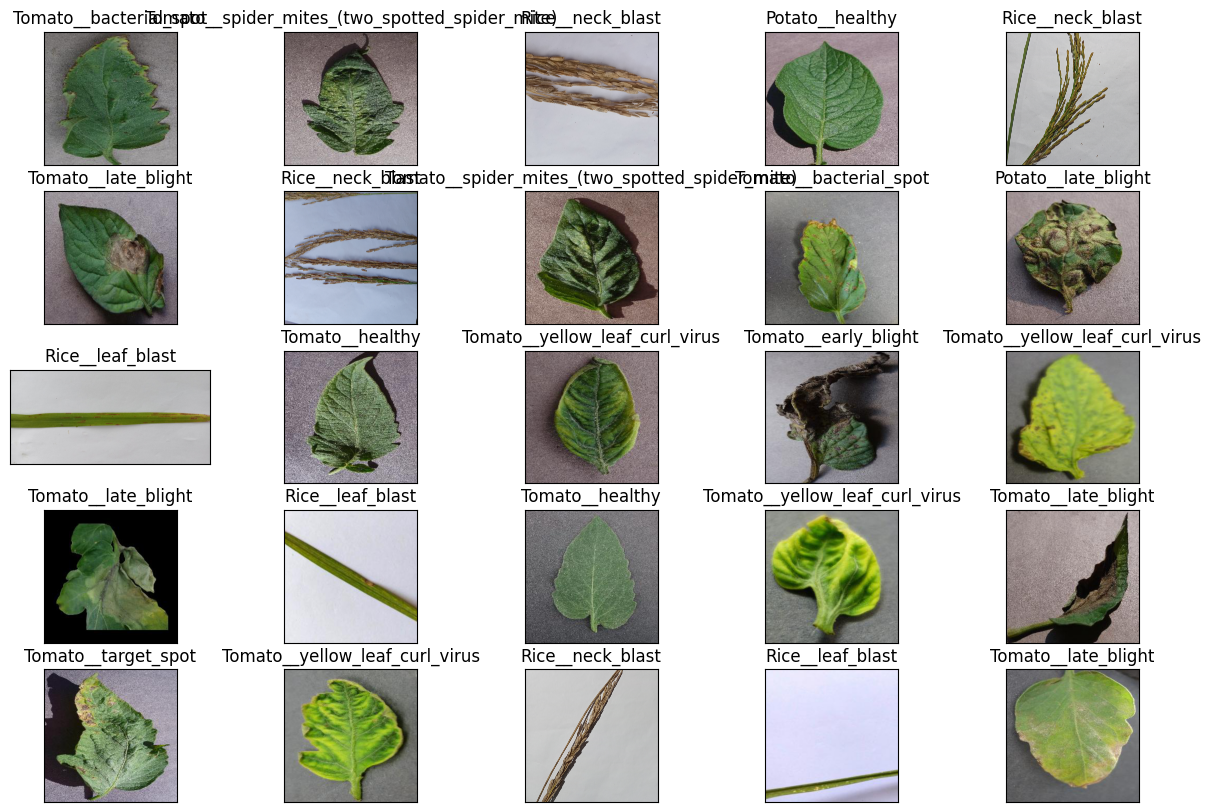

In [126]:
# Display 20 picture of the dataset with their labels
random_index = np.random.randint(0, len(image_df), 25)
fig, axes = plt.subplots(nrows=5, ncols=5, figsize=(15, 10),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(image_df.Filepath[random_index[i]]))
    ax.set_title(image_df.Label[random_index[i]])
# plt.tight_layout()
plt.show()

# FEATURE ENGINEERING

In [128]:
#CREATION OF TRAIN AND TEST DATA
train_df, test_df = train_test_split (image_df, train_size = 0.8, shuffle = True, random_state = 500)

# DATA AUGMENTATION

In [129]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    rotation_range = 40,
    width_shift_range = 0.2,
    height_shift_range = 0.2,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.2)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255)

In [130]:
dir(tf.keras.preprocessing.image.ImageDataGenerator())

['__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_keras_api_names',
 '_keras_api_names_v1',
 '_validation_split',
 'apply_transform',
 'brightness_range',
 'channel_axis',
 'channel_shift_range',
 'col_axis',
 'cval',
 'data_format',
 'dtype',
 'featurewise_center',
 'featurewise_std_normalization',
 'fill_mode',
 'fit',
 'flow',
 'flow_from_dataframe',
 'flow_from_directory',
 'get_random_transform',
 'height_shift_range',
 'horizontal_flip',
 'interpolation_order',
 'mean',
 'preprocessing_function',
 'random_transform',
 'rescale',
 'rotation_range',
 'row_axis',
 'samplewise_center',
 'samplewise_std_normalization',
 'shear_range',
 'standardize',
 'std',
 'vertica

In [132]:
print(tf.keras.preprocessing.image.ImageDataGenerator().__doc__)

Generate batches of tensor image data with real-time data augmentation.

    Deprecated: `tf.keras.preprocessing.image.ImageDataGenerator` is not
    recommended for new code. Prefer loading images with
    `tf.keras.utils.image_dataset_from_directory` and transforming the output
    `tf.data.Dataset` with preprocessing layers. For more information, see the
    tutorials for [loading images](
    https://www.tensorflow.org/tutorials/load_data/images) and
    [augmenting images](
    https://www.tensorflow.org/tutorials/images/data_augmentation), as well as
    the [preprocessing layer guide](
    https://www.tensorflow.org/guide/keras/preprocessing_layers).

     The data will be looped over (in batches).

    Args:
        featurewise_center: Boolean. Set input mean to 0 over the dataset,
          feature-wise.
        samplewise_center: Boolean. Set each sample mean to 0.
        featurewise_std_normalization: Boolean. Divide inputs by std of the
          dataset, feature-wise.
   